This notebook is intended to explore the data and do some feature engineering, in an attempt to make our model / models do better.

In [1]:
import pandas as pd

train = pd.read_csv('../data/train_with_rounded_score.csv')

In [2]:
train['fips'].value_counts()

1001     887
39159    887
39115    887
39117    887
39119    887
        ... 
21159    887
21161    887
21163    887
21165    887
56043    887
Name: fips, Length: 3108, dtype: int64

In [3]:
single_county = train.loc[(train['fips'] >= 1001) & (train['fips'] <= 1001)]

In [4]:
single_county.var()

/tmp/ipykernel_574336/2772462526.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  single_county.var()


fips            0.000000
PRECTOT        70.782032
PS              0.258336
QV2M           21.902219
T2M            71.364997
T2MDEW         66.071255
T2MWET         65.672210
T2M_MAX        73.917536
T2M_MIN        73.479092
T2M_RANGE      11.214626
TS             72.716599
WS10M           0.557655
WS10M_MAX       1.245619
WS10M_MIN       0.384945
WS10M_RANGE     0.676556
WS50M           1.798121
WS50M_MAX       2.521050
WS50M_MIN       1.882764
WS50M_RANGE     1.694389
score           2.054255
dtype: float64

In [5]:
train.var()

/tmp/ipykernel_574336/3617257294.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.var()


fips           2.243737e+08
PRECTOT        3.903238e+01
PS             2.964474e+01
QV2M           2.229217e+01
T2M            1.203497e+02
T2MDEW         1.039921e+02
T2MWET         1.028934e+02
T2M_MAX        1.346285e+02
T2M_MIN        1.127458e+02
T2M_RANGE      1.630562e+01
TS             1.252373e+02
WS10M          3.413792e+00
WS10M_MAX      6.808023e+00
WS10M_MIN      1.802194e+00
WS10M_RANGE    3.775779e+00
WS50M          5.283331e+00
WS50M_MAX      8.046399e+00
WS50M_MIN      4.451867e+00
WS50M_RANGE    4.756849e+00
score          1.535295e+00
dtype: float64

In [6]:
train.var() > single_county.var()

/tmp/ipykernel_574336/344314659.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.var() > single_county.var()
/tmp/ipykernel_574336/344314659.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.var() > single_county.var()


fips            True
PRECTOT        False
PS              True
QV2M            True
T2M             True
T2MDEW          True
T2MWET          True
T2M_MAX         True
T2M_MIN         True
T2M_RANGE       True
TS              True
WS10M           True
WS10M_MAX       True
WS10M_MIN       True
WS10M_RANGE     True
WS50M           True
WS50M_MAX       True
WS50M_MIN       True
WS50M_RANGE     True
score          False
dtype: bool

We can see that the variance of the entire training set is higher than the variance of the training set for just one county in many of the features. This makes sense, as different counties likely have different drought conditions. 

In [7]:
alabama = train.loc[(train['fips'] > 1000) & (train['fips'] < 2000)]

In [8]:
alabama.var()

/tmp/ipykernel_574336/363542240.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  alabama.var()


fips           1496.025173
PRECTOT          64.740118
PS                1.009685
QV2M             21.755892
T2M              73.864551
T2MDEW           66.561731
T2MWET           66.193030
T2M_MAX          78.072929
T2M_MIN          75.340428
T2M_RANGE        11.695039
TS               74.970636
WS10M             0.664036
WS10M_MAX         1.450697
WS10M_MIN         0.420615
WS10M_RANGE       0.755289
WS50M             1.879605
WS50M_MAX         2.639909
WS50M_MIN         1.940224
WS50M_RANGE       1.711696
score             2.015011
dtype: float64

In [9]:
alabama.var() > single_county.var()

/tmp/ipykernel_574336/866035229.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  alabama.var() > single_county.var()
/tmp/ipykernel_574336/866035229.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  alabama.var() > single_county.var()


fips            True
PRECTOT        False
PS              True
QV2M           False
T2M             True
T2MDEW          True
T2MWET          True
T2M_MAX         True
T2M_MIN         True
T2M_RANGE       True
TS              True
WS10M           True
WS10M_MAX       True
WS10M_MIN       True
WS10M_RANGE     True
WS50M           True
WS50M_MAX       True
WS50M_MIN       True
WS50M_RANGE     True
score          False
dtype: bool

In [10]:
alabama.var() > train.var()

/tmp/ipykernel_574336/3616867503.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  alabama.var() > train.var()
/tmp/ipykernel_574336/3616867503.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  alabama.var() > train.var()


fips           False
PRECTOT         True
PS             False
QV2M           False
T2M            False
T2MDEW         False
T2MWET         False
T2M_MAX        False
T2M_MIN        False
T2M_RANGE      False
TS             False
WS10M          False
WS10M_MAX      False
WS10M_MIN      False
WS10M_RANGE    False
WS50M          False
WS50M_MAX      False
WS50M_MIN      False
WS50M_RANGE    False
score           True
dtype: bool

In [11]:
alabama['score'].var()

2.01501072806862

In [12]:
train['score'].var()

1.5352950806023853

(array([33579., 10061.,  6104.,  4536.,  5149.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

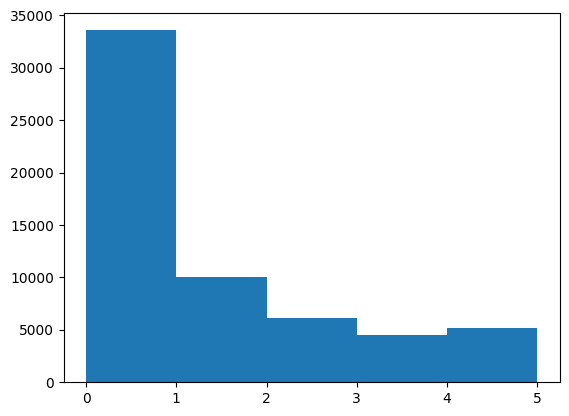

In [15]:
plt.hist(alabama['score'], bins=5)

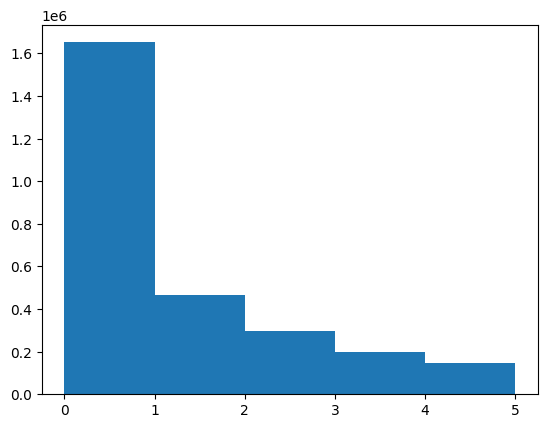

In [14]:
import matplotlib.pyplot as plt

plt.hist(train['score'], bins=5)
plt.show()

In [16]:
alabama['score'].value_counts() / len(alabama)

0    0.565027
1    0.169294
2    0.102711
3    0.076326
4    0.049168
5    0.037473
Name: score, dtype: float64

In [18]:
train['score'].value_counts() / len(train)

0    0.599330
1    0.169379
2    0.107128
3    0.071388
4    0.038547
5    0.014228
Name: score, dtype: float64

We can see that across the whole state of alabama, the variance in the features is lower than that of the whole training set. However, the class balance is relatively the same.

In [19]:
from catboost import CatBoostClassifier

#train model on alabama without date or fips columns

model = CatBoostClassifier()
model.fit(alabama.drop(columns=['date', 'fips', 'score']), alabama['score'])

Learning rate set to 0.097453
0:	learn: 1.6682104	total: 73.5ms	remaining: 1m 13s
1:	learn: 1.5830996	total: 96.4ms	remaining: 48.1s
2:	learn: 1.5206812	total: 120ms	remaining: 39.9s
3:	learn: 1.4727630	total: 148ms	remaining: 36.8s
4:	learn: 1.4346254	total: 175ms	remaining: 34.9s
5:	learn: 1.4037385	total: 206ms	remaining: 34.2s
6:	learn: 1.3784484	total: 233ms	remaining: 33s
7:	learn: 1.3573200	total: 265ms	remaining: 32.8s
8:	learn: 1.3399807	total: 295ms	remaining: 32.5s
9:	learn: 1.3253112	total: 330ms	remaining: 32.6s
10:	learn: 1.3133087	total: 367ms	remaining: 33s
11:	learn: 1.3027429	total: 394ms	remaining: 32.5s
12:	learn: 1.2929508	total: 429ms	remaining: 32.5s
13:	learn: 1.2835581	total: 468ms	remaining: 33s
14:	learn: 1.2768823	total: 499ms	remaining: 32.7s
15:	learn: 1.2705918	total: 531ms	remaining: 32.6s
16:	learn: 1.2648175	total: 567ms	remaining: 32.8s
17:	learn: 1.2596235	total: 604ms	remaining: 32.9s
18:	learn: 1.2550912	total: 638ms	remaining: 32.9s
19:	learn: 1.2

In [20]:
test = pd.read_csv('../data/test_with_rounded_score.csv')
alabama_test = test.loc[(test['fips'] > 1000) & (test['fips'] < 2000)]

#predict on alabama test data
predictions = model.predict(alabama_test.drop(columns=['date', 'fips', 'score']))

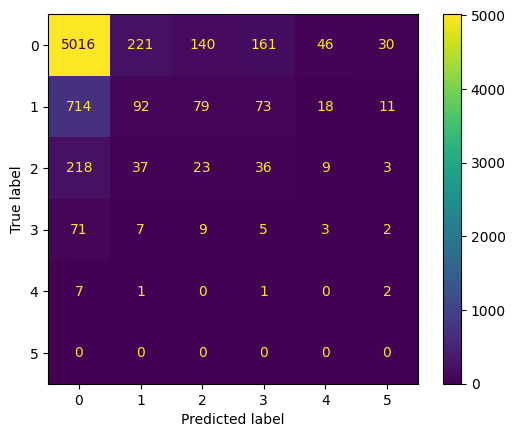

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report

cm = confusion_matrix(alabama_test['score'], predictions)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
plt.show()

In [27]:
# print f1, precision, recall
print(classification_report(alabama_test['score'], predictions))

print(f1_score(alabama_test['score'], predictions, average='weighted'))
print(precision_score(alabama_test['score'], predictions, average='weighted'))
print(recall_score(alabama_test['score'], predictions, average='weighted'))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      5614
           1       0.26      0.09      0.14       987
           2       0.09      0.07      0.08       326
           3       0.02      0.05      0.03        97
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         0

    accuracy                           0.73      7035
   macro avg       0.20      0.18      0.18      7035
weighted avg       0.70      0.73      0.71      7035

0.7110266389274001
0.7048082890323065
0.7300639658848614


/home/sidharth/Documents/School/2022_2023/ECE461P_DSP/ECE461P_Project/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sidharth/Documents/School/2022_2023/ECE461P_DSP/ECE461P_Project/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sidharth/Documents/School/2022_2023/ECE461P_DSP/ECE461P_Project/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `ze